# 결정 트리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기

In [5]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [6]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [7]:
wine.info() #각 열의 데이터 타입과 누락된 데이터가 있는지 확인. 요약된 정보를 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [8]:
wine.describe() #열의 통계값을 출력

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [9]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) #train_size=0.8. 샘플개수가 충분히 많으므로 20% 정도만 테스트세트로 나눔

In [11]:
print(train_input.shape, test_input.shape) #3은 컬럼수

(5197, 3) (1300, 3)


In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#StandardScaler 클래스를 사용해 전처리 -> 같은 객체를 사용해 테스트 세트를 변환

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

In [14]:
print(lr.coef_, lr.intercept_) #로지스틱 회귀가 학습한 계수와 절편을 출력

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


## 결정 트리

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target) #fit() 메소드로 훈련 -> score() 메소드로 정확도를 평가

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) #과대적합 보완 => 앙상블모델

0.996921300750433
0.8592307692307692


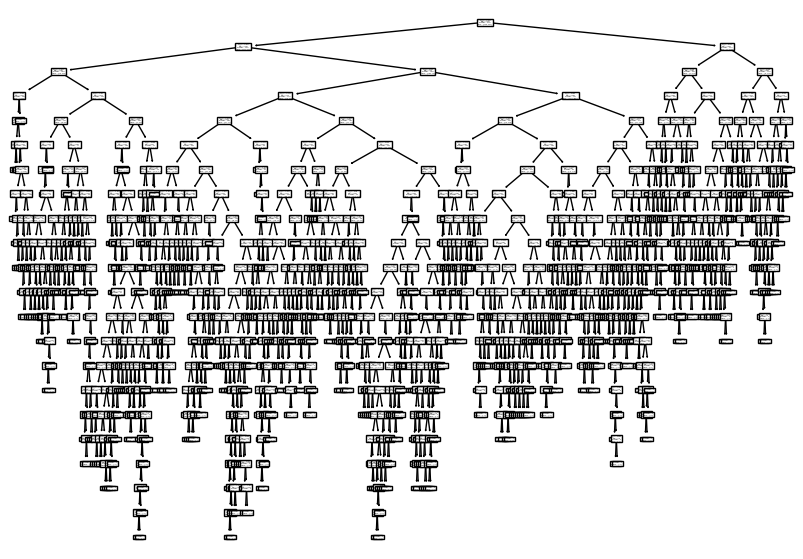

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree #plot_tree() 함수를 사용해 결정트리를 이해하기 쉬운 트리그림으로 출력해줌

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

#plot_tree(): 결정 트리 모델dmf 시각화. max_depth로 트리의 깊이를 지정, feature_names로 특성의 이름을 지정, filled=True 지정 시 타깃값에 따라 노드 안에 색을 채움

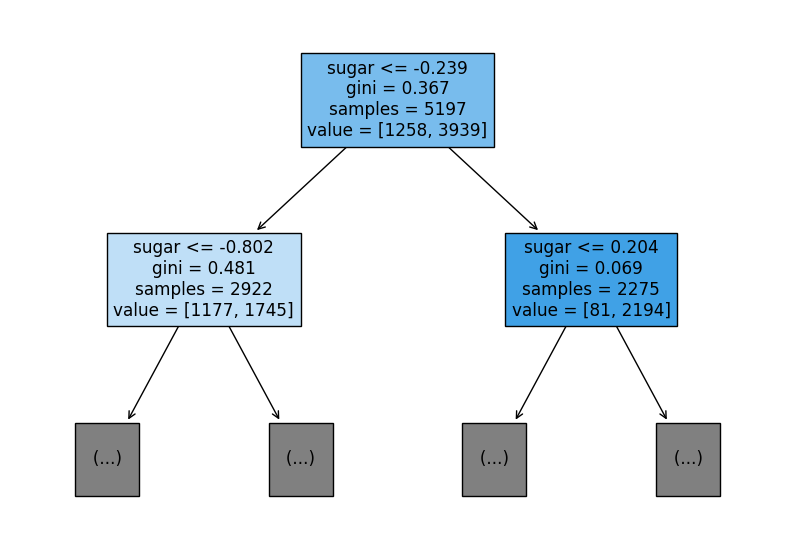

In [17]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) #max_depth는 트리가 성장할 최대 깊이를 지정 (기본값은 None)
plt.show()

#트리의 깊이를 제한해서 출력. max_depth=1: 루트노드를 제외하고 하나의 노드를 더 확장하여 그림
#filled=True 지정 시 클래스마다 색깔을 부여하고, 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시
#gini는 지니불순도(Gini impurity). DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'

### 가지치기

In [18]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) #max_depth=3: 하이퍼파라미터
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#훈련세트에는 아주 잘 맞지만 테스트세트에서 점수는 그에 못 미치는 경우(=일반화가 잘 안 된 경우) '가지치기'
#가지치기를 하는 가장 간단한 방법=자라날 수 있는 트리의 최대 깊이를 지정

0.8454877814123533
0.8415384615384616


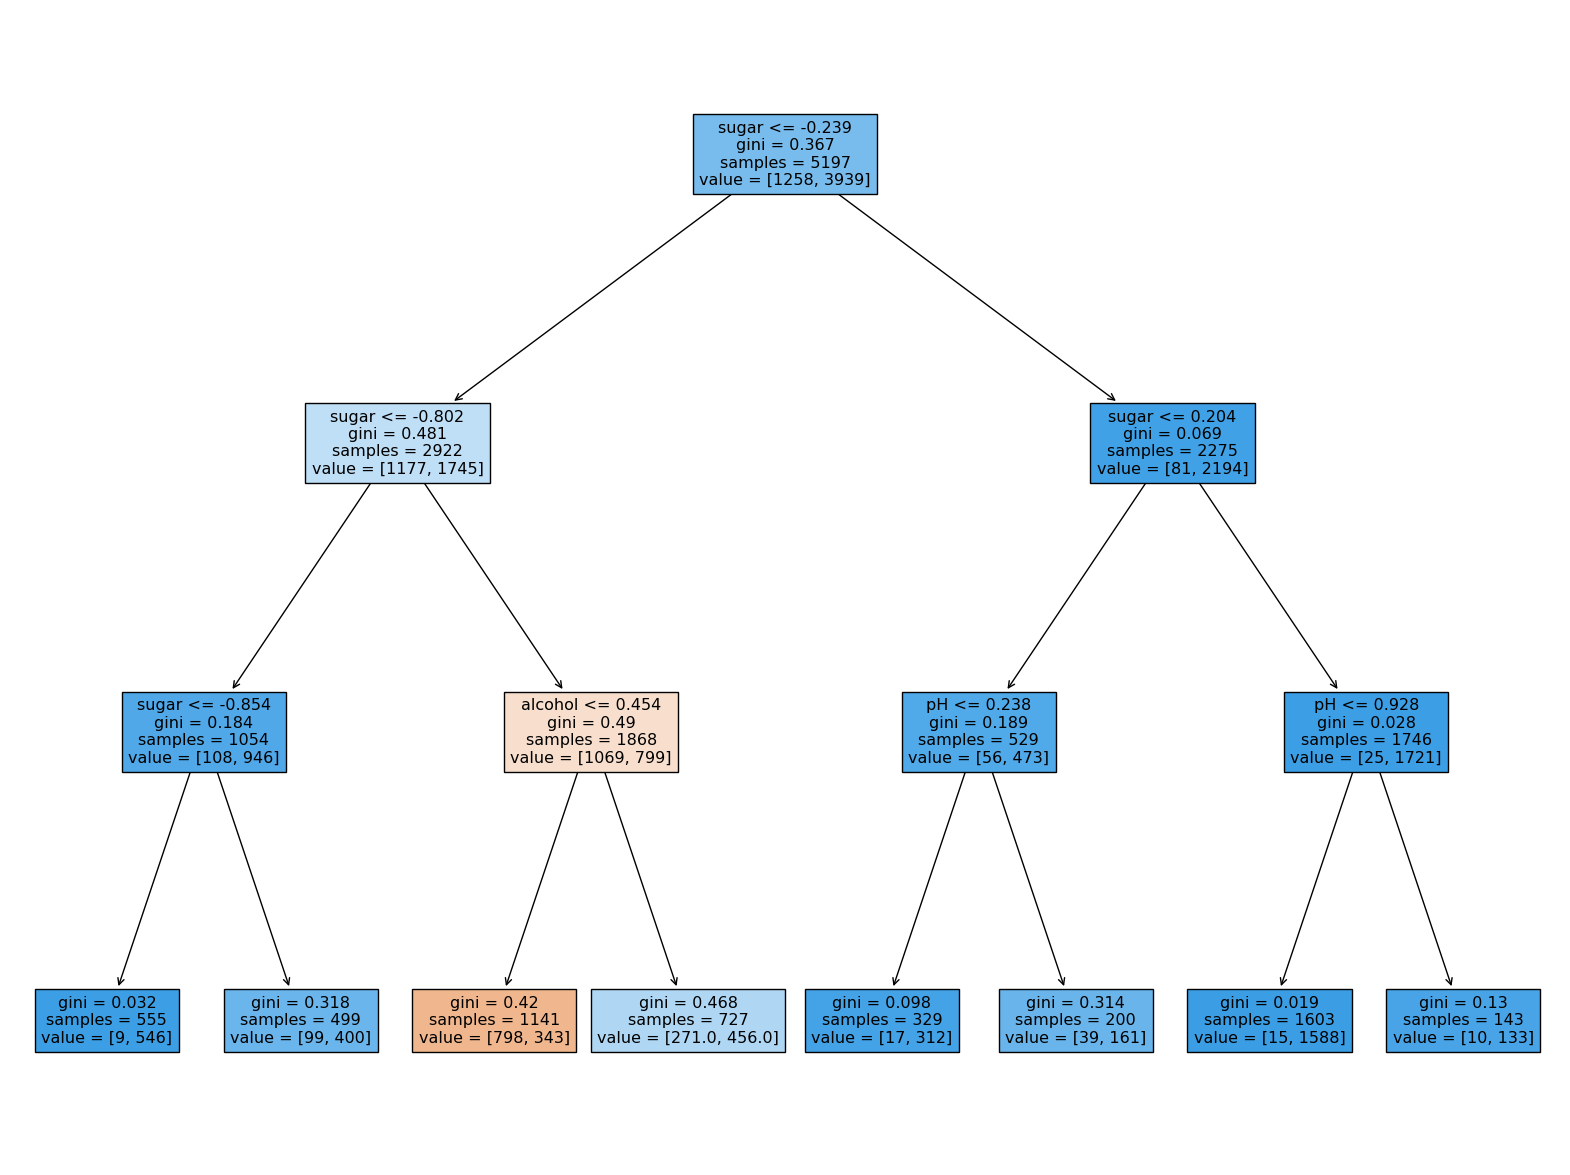

In [19]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [20]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


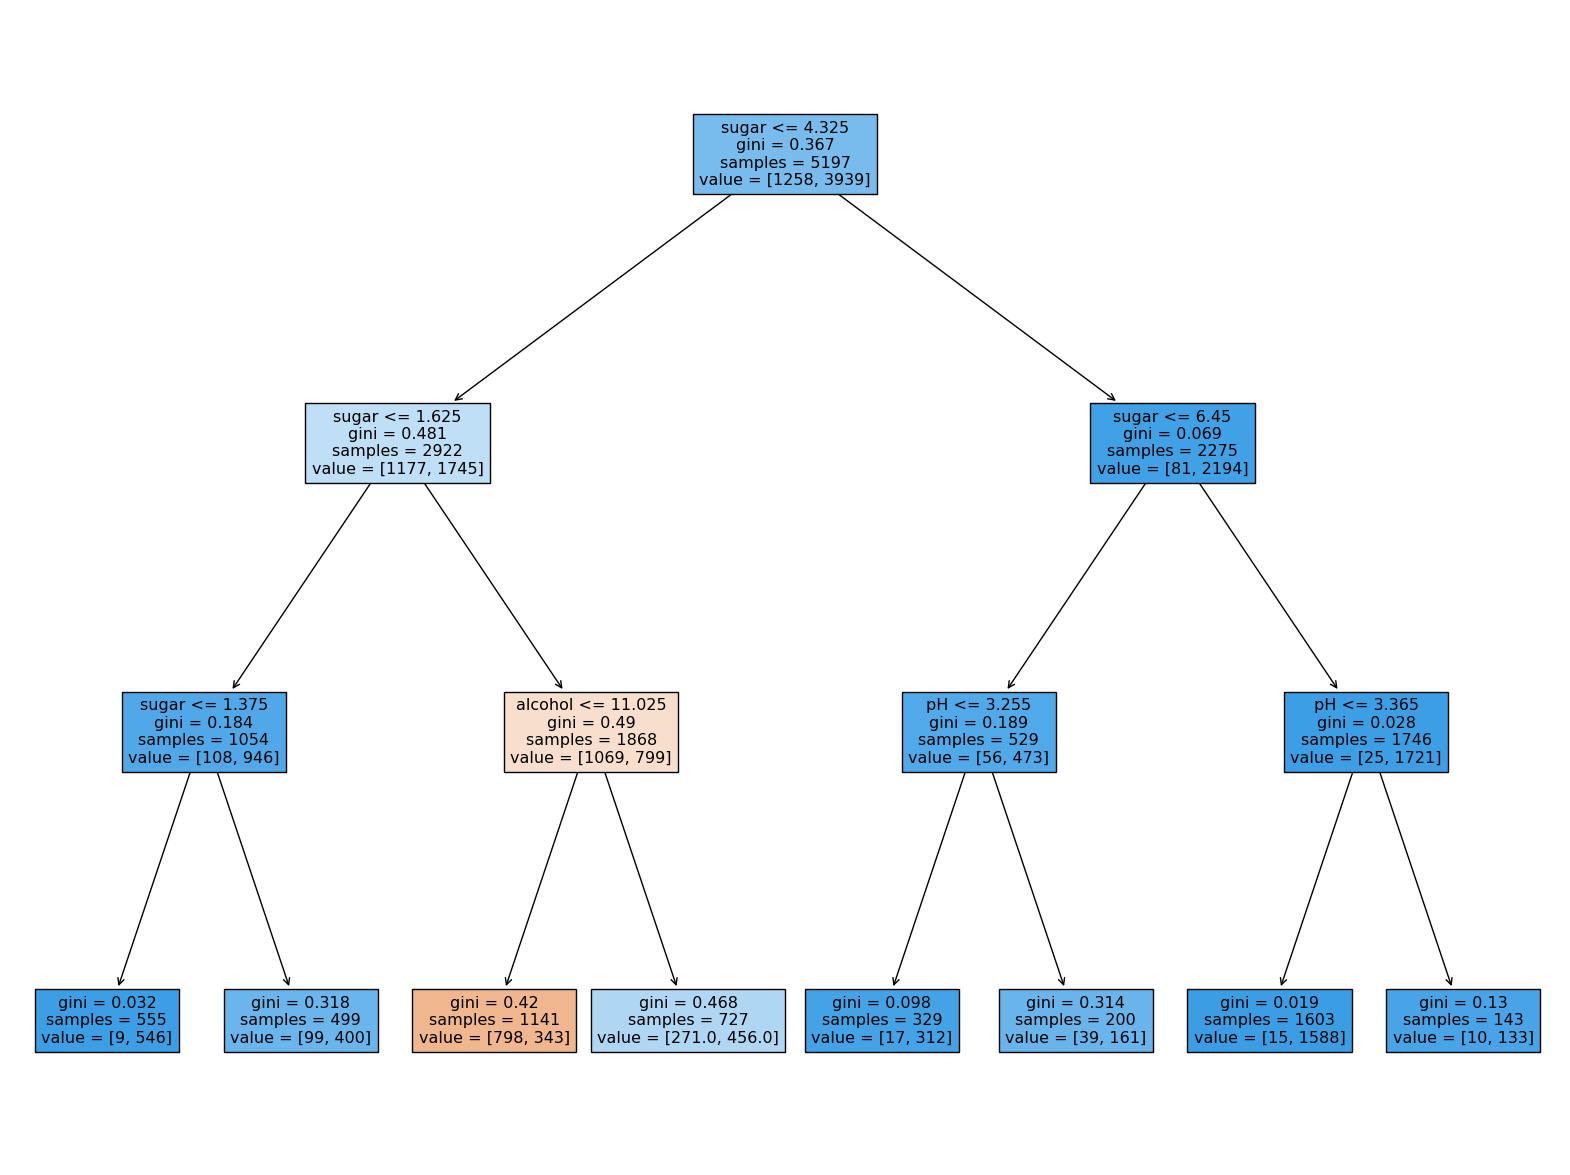

In [21]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [22]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


## 확인문제

In [23]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


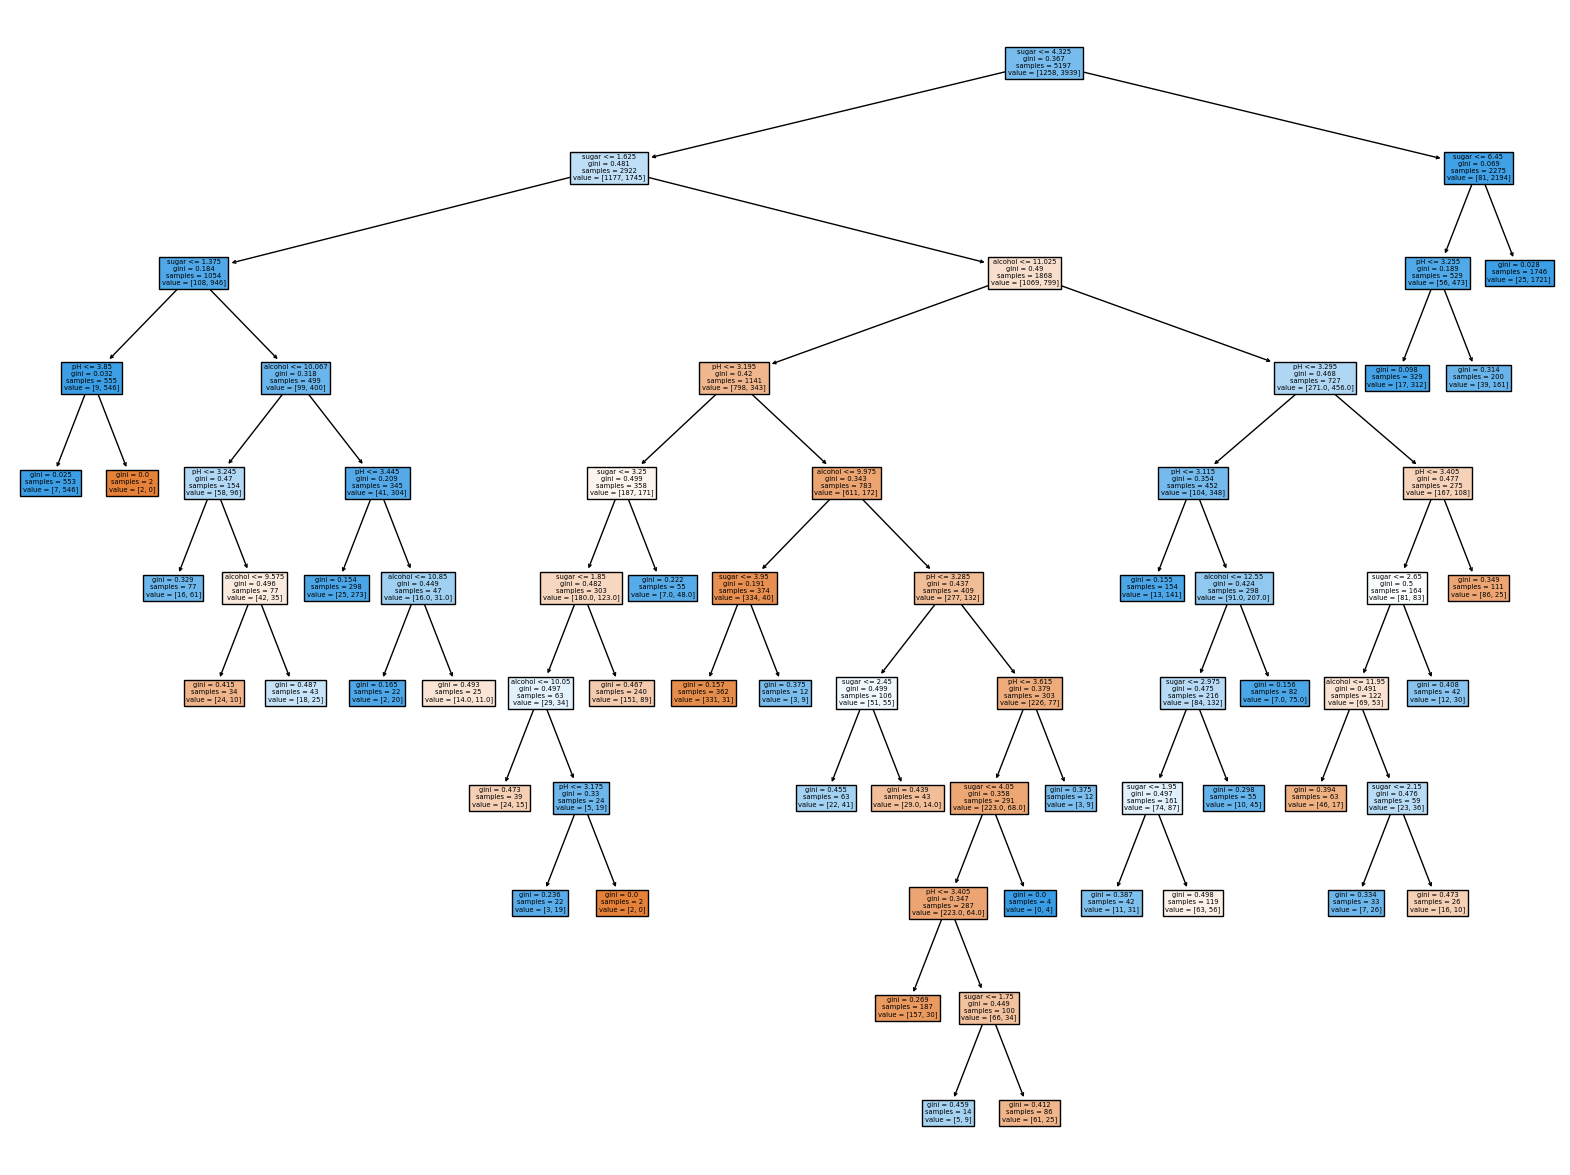

In [24]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()